# IMPORTING THE REQUIRED LIBRARIES

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import stats, chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score,recall_score,  plot_roc_curve

import warnings
warnings.filterwarnings('ignore')

# IMPORTING CSV TO DATAFRAME AND  BASIC DATA EXPLORATION
**Import the CSV file into a DataFrame and perform basic data exploratorion**

In [2]:
data = pd.read_csv("credit.csv")

In [3]:
#Displaying first 5 rows of the DataFrame
data.head()

,Default,checkingstatus1,duration,history,purpose,amount,savings,employ,installment,status,...,residence,property,age,otherplans,housing,cards,job,liable,tele,foreign
0,0,A11,6,A34,A43,1169,A65,A75,4,A93,...,4,A121,67,A143,A152,2,A173,1,A192,A201
1,1,A12,48,A32,A43,5951,A61,A73,2,A92,...,2,A121,22,A143,A152,1,A173,1,A191,A201
2,0,A14,12,A34,A46,2096,A61,A74,2,A93,...,3,A121,49,A143,A152,1,A172,2,A191,A201
3,0,A11,42,A32,A42,7882,A61,A74,2,A93,...,4,A122,45,A143,A153,1,A173,2,A191,A201
4,1,A11,24,A33,A40,4870,A61,A73,3,A93,...,4,A124,53,A143,A153,2,A173,2,A191,A201


In [4]:
#Displaying last 5 rows of the DataFrame
data.tail()

,Default,checkingstatus1,duration,history,purpose,amount,savings,employ,installment,status,...,residence,property,age,otherplans,housing,cards,job,liable,tele,foreign
995,0,A14,12,A32,A42,1736,A61,A74,3,A92,...,4,A121,31,A143,A152,1,A172,1,A191,A201
996,0,A11,30,A32,A41,3857,A61,A73,4,A91,...,4,A122,40,A143,A152,1,A174,1,A192,A201
997,0,A14,12,A32,A43,804,A61,A75,4,A93,...,4,A123,38,A143,A152,1,A173,1,A191,A201
998,1,A11,45,A32,A43,1845,A61,A73,4,A93,...,4,A124,23,A143,A153,1,A173,1,A192,A201
999,0,A12,45,A34,A41,4576,A62,A71,3,A93,...,4,A123,27,A143,A152,1,A173,1,A191,A201


In [5]:
#Displaying the total number of columns and rows in the DataFrame
data.shape

(1000, 21)

In [6]:
#Showing the sum of null data
data.isnull().sum()

Default            0
checkingstatus1    0
duration           0
history            0
purpose            0
amount             0
savings            0
employ             0
installment        0
status             0
others             0
residence          0
property           0
age                0
otherplans         0
housing            0
cards              0
job                0
liable             0
tele               0
foreign            0
dtype: int64

In [7]:
# Observing the summary information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Default          1000 non-null   int64 
 1   checkingstatus1  1000 non-null   object
 2   duration         1000 non-null   int64 
 3   history          1000 non-null   object
 4   purpose          1000 non-null   object
 5   amount           1000 non-null   int64 
 6   savings          1000 non-null   object
 7   employ           1000 non-null   object
 8   installment      1000 non-null   int64 
 9   status           1000 non-null   object
 10  others           1000 non-null   object
 11  residence        1000 non-null   int64 
 12  property         1000 non-null   object
 13  age              1000 non-null   int64 
 14  otherplans       1000 non-null   object
 15  housing          1000 non-null   object
 16  cards            1000 non-null   int64 
 17  job              1000 non-null   o

In [8]:
# Displaying the descriptive statistics of the data
data.describe()

,Default,duration,amount,installment,residence,age,cards,liable
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,0.458487,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,0.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,0.000000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,0.000000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,1.000000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,1.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [9]:
## Finding unique values for each column
data.nunique()

Default              2
checkingstatus1      4
duration            33
history              5
purpose             10
amount             921
savings              5
employ               5
installment          4
status               4
others               3
residence            4
property             4
age                 53
otherplans           3
housing              3
cards                4
job                  4
liable               2
tele                 2
foreign              2
dtype: int64

In [10]:
duplicate_rows = data.duplicated()
duplicate_rows

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

# DATA DISTRIBUTION AND VISUALIZATION

## TARGET VARIABLE COUNT AND DISTRIBUTION

0    700
1    300
Name: Default, dtype: int64


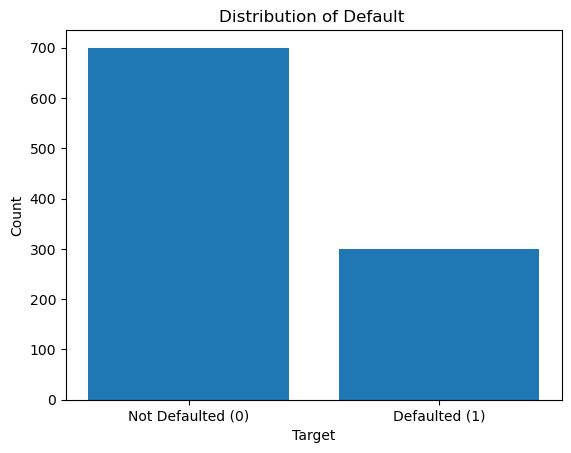

In [11]:
# Count number of defaulted loans
target_count = data['Default'].value_counts()
print(target_count)

# Plot defaulted loans
plt.bar(target_count.index, target_count.values)
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Defaulted (0)', 'Defaulted (1)'])
plt.title('Distribution of Default ')
plt.show()

## DISTRIBUTION AND VISUALIZATION OF PREDICTORS
**Based on the exploratory analysis, Predictors/Columns can be grouped into two, ie. Numerical/Continuous
and then Categorical.**

## CONTINUOUS/NUMERICAL COLUMNS

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'amount'}>],
       [<AxesSubplot:title={'center':'duration'}>, <AxesSubplot:>]],
      dtype=object)

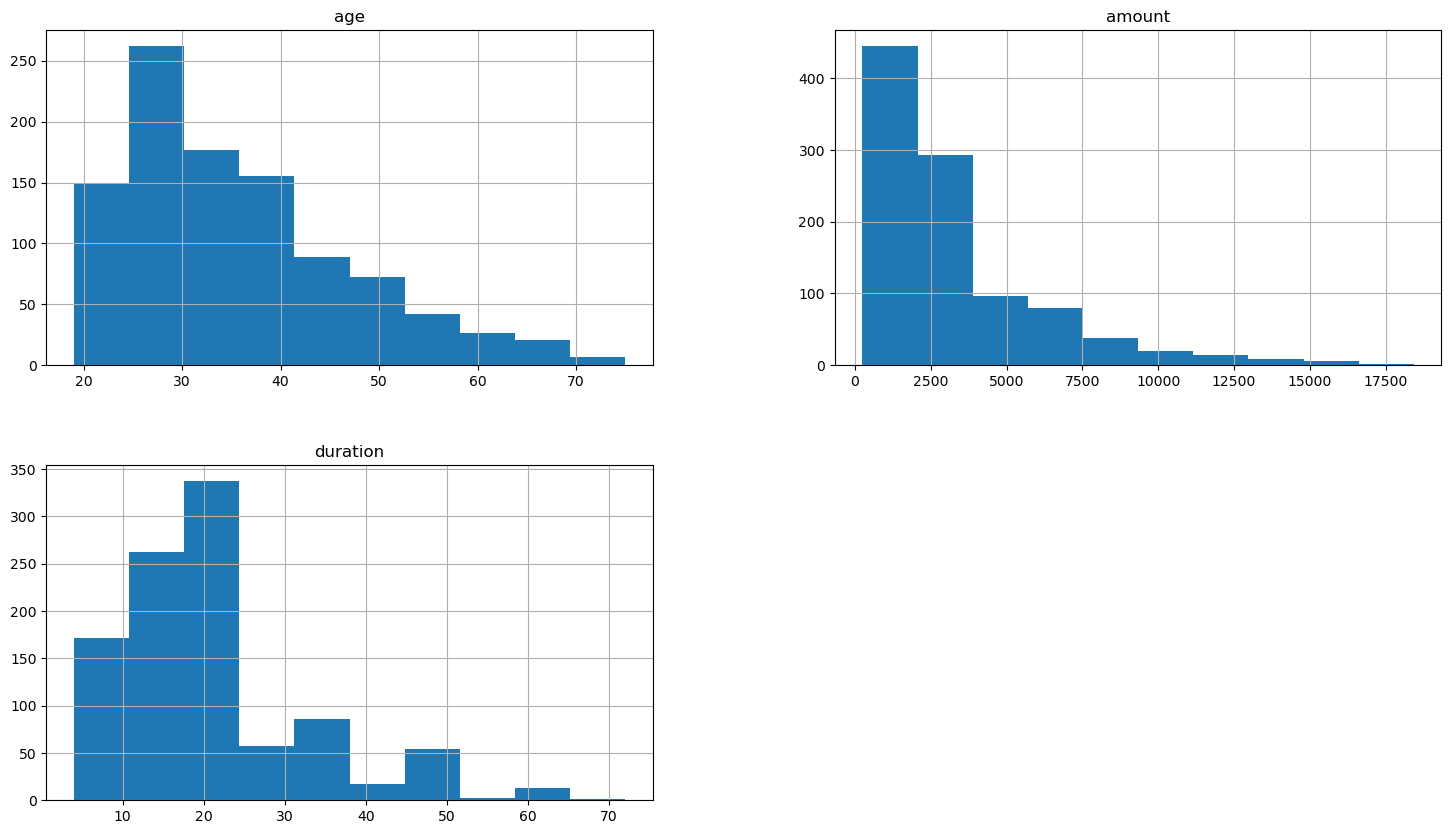

In [12]:
#Plotting histogram for continuous columns.
data.hist(['age','amount','duration'], figsize=(18,10))

## CATEGORICAL COLUMNS
**From our exploratory analysis. We determine there are over 17 categorical columns in our data
<br> we define a function to plot the categorical columns**
<br> *For Categorical Columns, we visualize the distribution with bar charts*


In [13]:
#Defining a function to plot bar charts of multiple columns

def plot_categorical_columns (input_df, columns_plotting):
    
    # Generating multiple subplots
    fig, sub_plot=plt.subplots(nrows=1, ncols=len(columns_plotting), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(columns_plotting))

    for col_name, plotNumber in zip(columns_plotting, range(len(columns_plotting))):
        input_df.groupby(col_name).size().plot(kind='bar',ax=sub_plot[plotNumber])

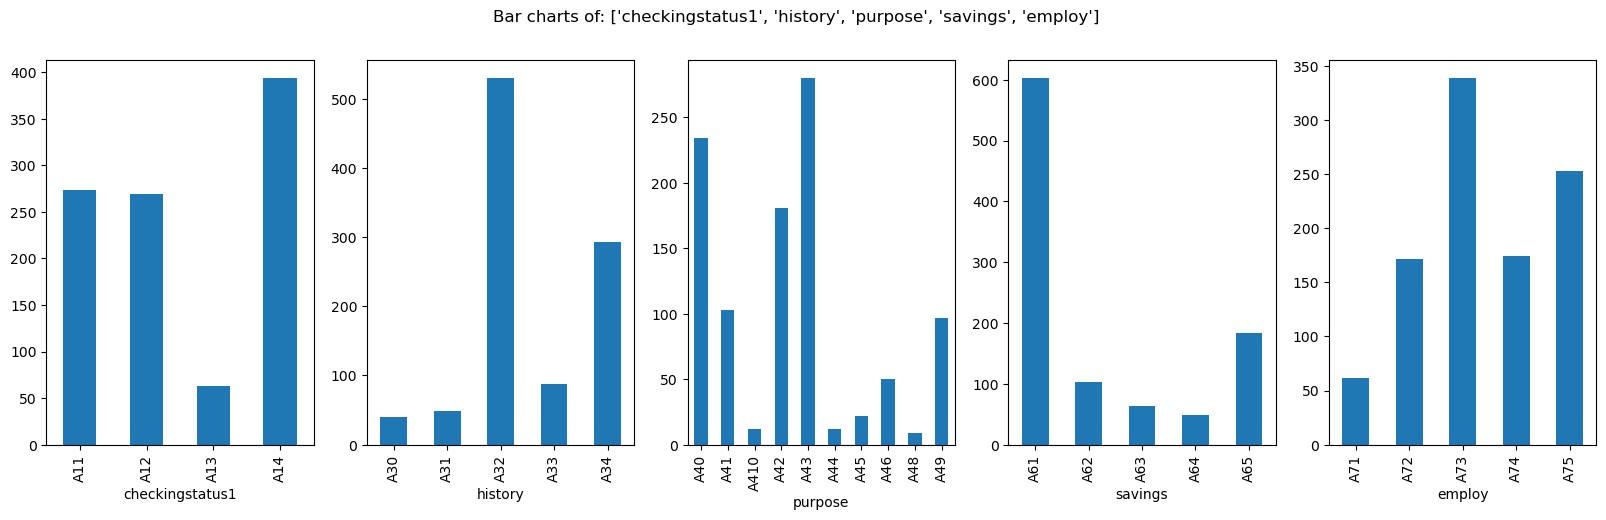

In [14]:
# Plotting 5 columns with the function
plot_categorical_columns(input_df = data, 
              columns_plotting = ['checkingstatus1', 'history', 'purpose','savings','employ'])

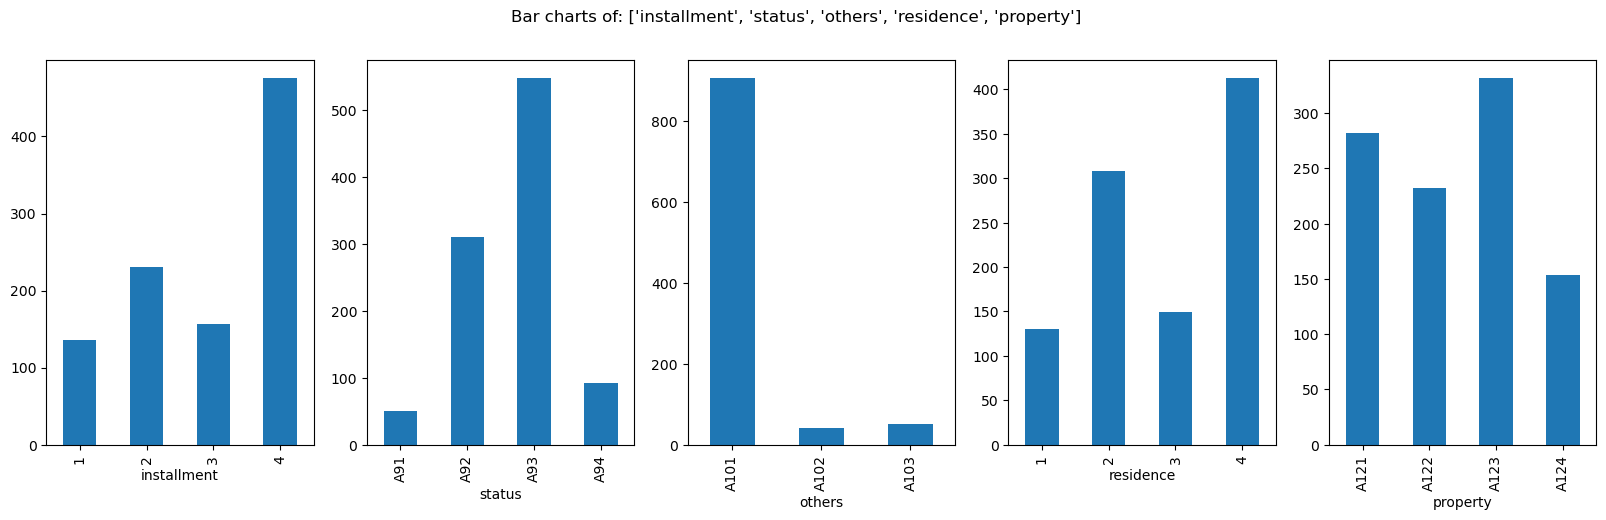

In [15]:
# # Plotting 5 columns with the function
plot_categorical_columns(input_df = data, 
              columns_plotting = ['installment', 'status', 'others','residence', 'property'])

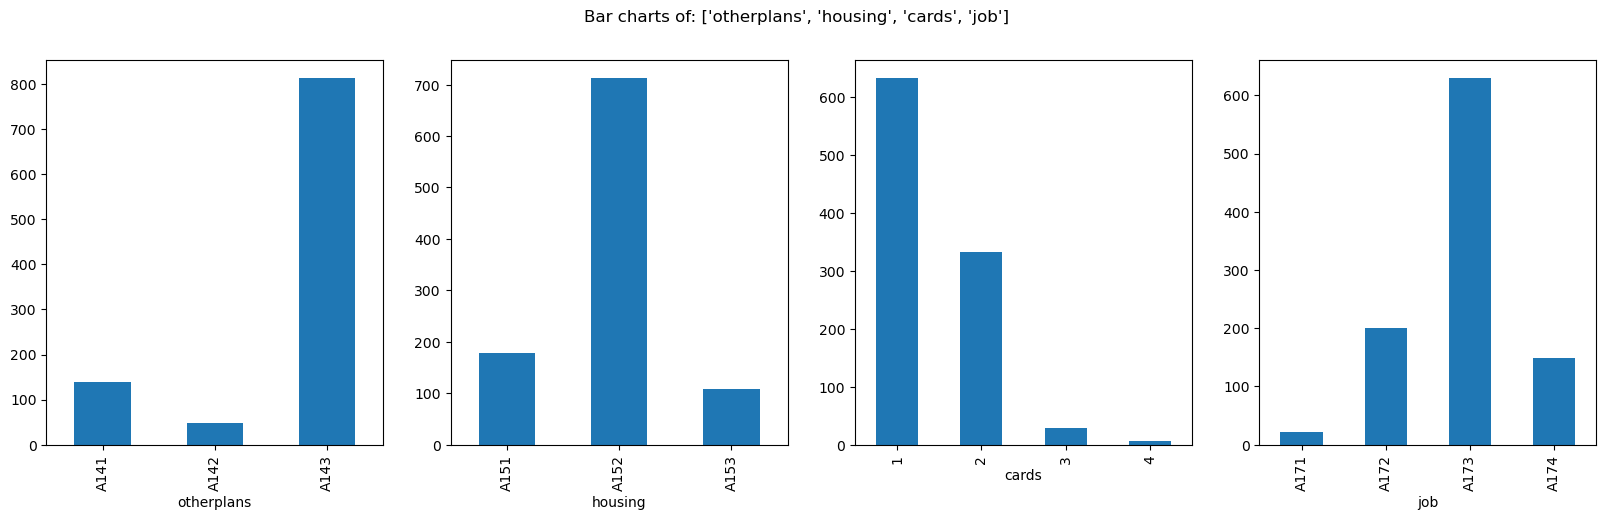

In [16]:
# # Plotting 4 columns with the function
plot_categorical_columns(input_df = data, 
              columns_plotting = ['otherplans', 'housing', 'cards', 'job'])

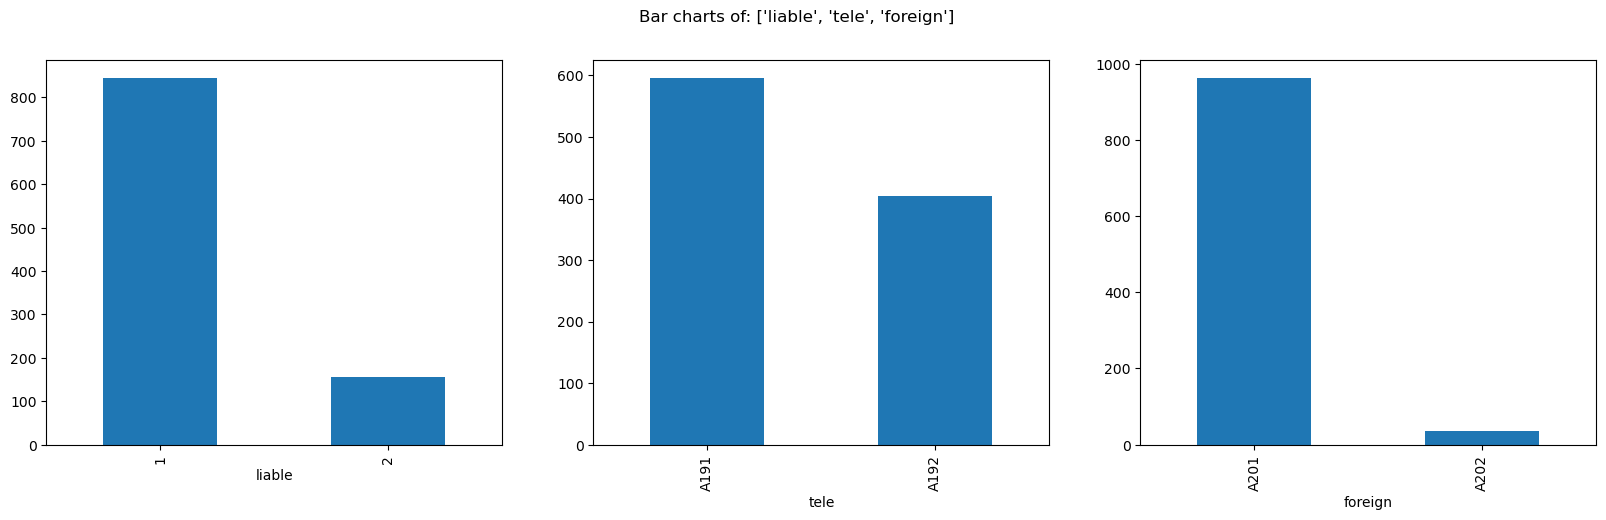

In [17]:
# Plotting the remaining 3 columns with the function
plot_categorical_columns(input_df = data, 
              columns_plotting = ['liable', 'tele', 'foreign'])

# FEATURE SELECTION
**For feature selection, we measure the correlation and visualize the relationship between our predictors and our target variable**


## VISUALIZING THE RELATIONSHIP BETWEEN CONTINUOUS COLUMNS AND THE TARGET

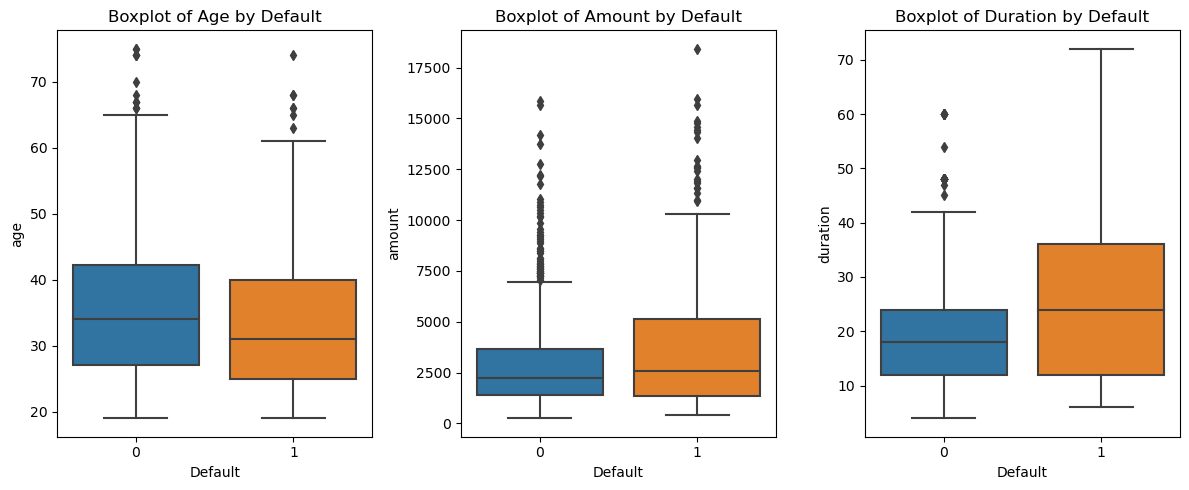

In [18]:
# We create boxplots to visualize the relationship
fig, axs = plt.subplots(ncols=3, figsize=(12, 5))

# Create box plots for age, amount, and duration with the target variable "Default"
sns.boxplot(x='Default', y='age', data=data, ax=axs[0])
sns.boxplot(x='Default', y='amount', data=data, ax=axs[1])
sns.boxplot(x='Default', y='duration', data=data, ax=axs[2])

# Titles for each subplot
axs[0].set_title('Boxplot of Age by Default')
axs[1].set_title('Boxplot of Amount by Default')
axs[2].set_title('Boxplot of Duration by Default')
plt.tight_layout()
plt.show()

## STATISTICALLY ANALYZING RELATION WITH ANOVA
**To statistically determine the relationship between our continuous/numerical columns and our target which is categorical
<br> we use an Analysis of variance(ANOVA) test.**

In [19]:
# define target and numerical columns
target = 'Default'
numerical_cols = ['age', 'amount', 'duration']

# loop through each numerical column and perform ANOVA test
for col in numerical_cols:
    # perform ANOVA test
    f_stat, p_val = stats.f_oneway(data[data[target]==0][col], data[data[target]==1][col])
    
    # check if the p-value is less than 0.05
    if p_val < 0.05:
        print(f"The {col} column is related to the target variable {target}.F-statistic: {f_stat:.2f}, p-value: {p_val:.2e}")
    else:
        print(f"The {col} column is not related to the target variable {target}.F-statistic: {f_stat:.2f}, p-value: {p_val:.2e}")

The age column is related to the target variable Default.F-statistic: 8.36, p-value: 3.93e-03
The amount column is related to the target variable Default.F-statistic: 24.48, p-value: 8.80e-07
The duration column is related to the target variable Default.F-statistic: 48.33, p-value: 6.49e-12


## VISUALIZING THE RELATIONSHIP BETWEEN CATEGORICAL COLUMNS AND THE TARGET

In [20]:
#Create a new variable to group all categorical columns
categorical_cols = ['checkingstatus1', 'history', 'purpose', 'savings', 'employ',
                    'installment', 'status', 'others', 'residence', 'property',
                    'otherplans', 'housing', 'cards', 'job', 'liable', 'tele', 'foreign']

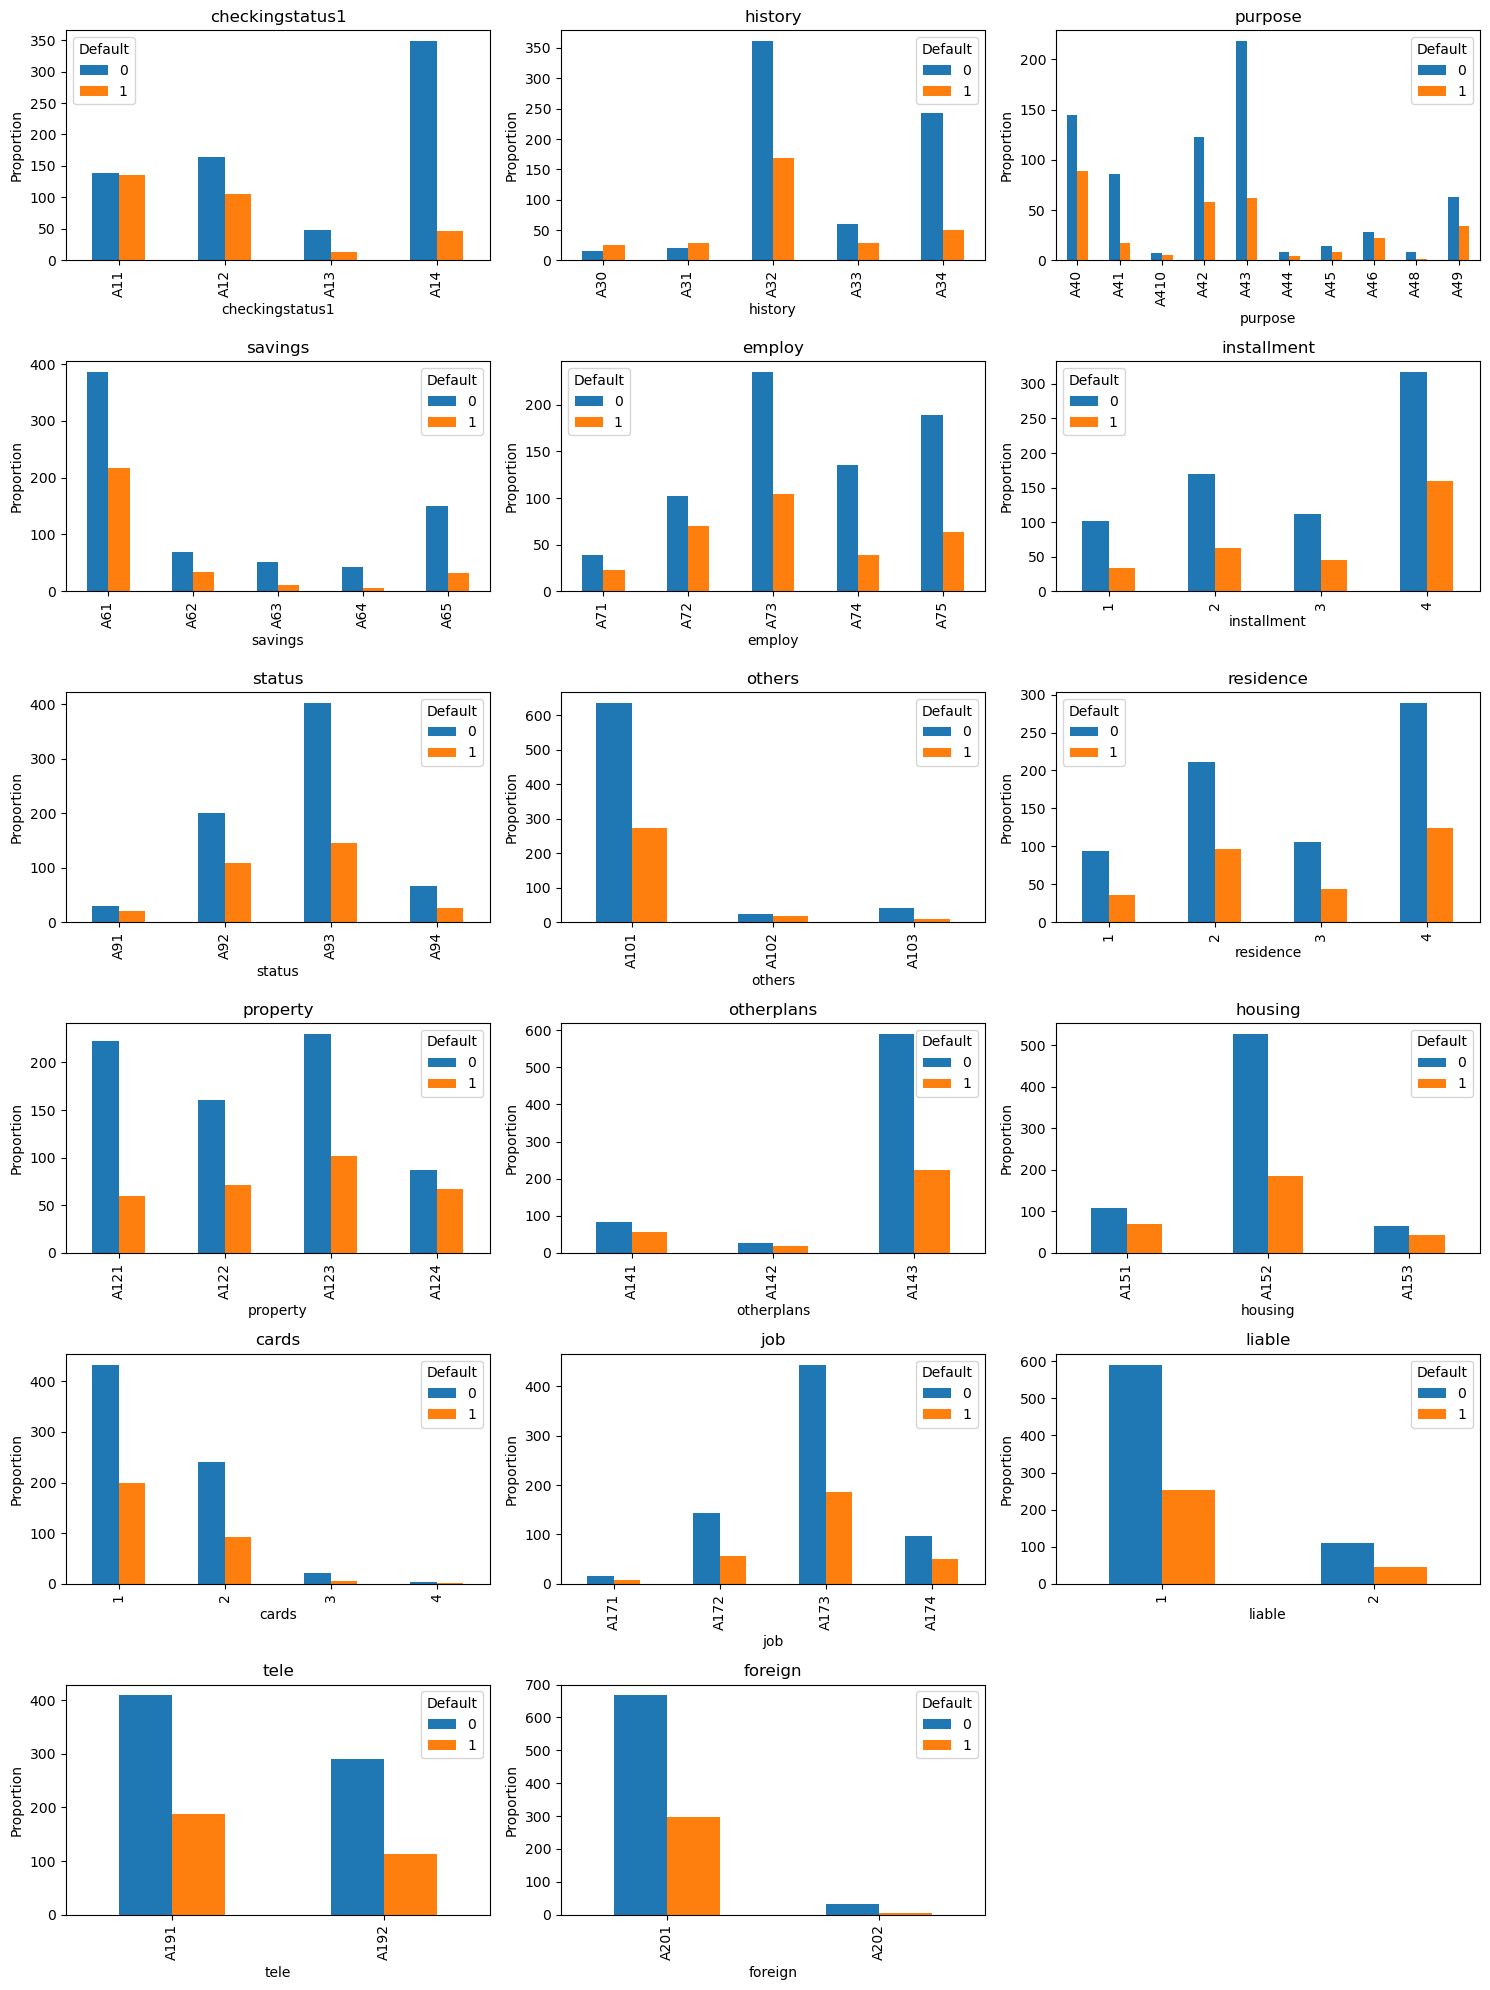

In [21]:
# Create bar charts for categorical column
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 20))
axes = axes.ravel()

for i, column in enumerate(categorical_cols):
    grouped_data = data.groupby(column)['Default'].value_counts().unstack()
    ax = grouped_data.plot(kind='bar', ax=axes[i])
    ax.set_title(column)
    ax.set_ylabel('Proportion')
    ax.set_xlabel(column)
    
fig.delaxes(axes[-1])    
plt.tight_layout()
plt.show()

## STATISTICALLY ANALYZING RELATION WITH CHI-SQUARE TEST
**To statistically determine the relationship between our categorical columns and our target which is categorical
<br> we use a Chi-Square test.**

In [22]:
for col in categorical_cols:
    # perform chi-squared test
    contingency_table = pd.crosstab(data[col], data[target])
    chi2, p_val, dof, expected = chi2_contingency(contingency_table)
    
    # check if the p-value is less than 0.05
    if p_val < 0.05:
        print(f"The {col} column is related to the target variable {target}. Chi-squared statistic: {chi2:.2f}, p-value: {p_val:.2e}")
    else:
        print(f"The {col} column is not related to the target variable {target}. Chi-squared statistic: {chi2:.2f}, p-value: {p_val:.2e}")


The checkingstatus1 column is related to the target variable Default. Chi-squared statistic: 123.72, p-value: 1.22e-26
The history column is related to the target variable Default. Chi-squared statistic: 61.69, p-value: 1.28e-12
The purpose column is related to the target variable Default. Chi-squared statistic: 33.36, p-value: 1.16e-04
The savings column is related to the target variable Default. Chi-squared statistic: 36.10, p-value: 2.76e-07
The employ column is related to the target variable Default. Chi-squared statistic: 18.37, p-value: 1.05e-03
The installment column is not related to the target variable Default. Chi-squared statistic: 5.48, p-value: 1.40e-01
The status column is related to the target variable Default. Chi-squared statistic: 9.61, p-value: 2.22e-02
The others column is related to the target variable Default. Chi-squared statistic: 6.65, p-value: 3.61e-02
The residence column is not related to the target variable Default. Chi-squared statistic: 0.75, p-value: 8.6

## FEATURES SELECTED
**Based on our tests for feature selection,select only the features that are correlated with our target variable
<br> and create a new DataFrame with those features/columns**


In [23]:
selected_features = ['checkingstatus1', 'history', 'purpose', 'savings', 'employ',
                    'status', 'others', 'property',
                    'otherplans', 'housing', 'foreign','age','duration','amount']

#Creating a new DataFrame and adding Target Column
final_data = data[selected_features]
final_data['Default'] = data['Default']
final_data

,checkingstatus1,history,purpose,savings,employ,status,others,property,otherplans,housing,foreign,age,duration,amount,Default
0,A11,A34,A43,A65,A75,A93,A101,A121,A143,A152,A201,67,6,1169,0
1,A12,A32,A43,A61,A73,A92,A101,A121,A143,A152,A201,22,48,5951,1
2,A14,A34,A46,A61,A74,A93,A101,A121,A143,A152,A201,49,12,2096,0
3,A11,A32,A42,A61,A74,A93,A103,A122,A143,A153,A201,45,42,7882,0
4,A11,A33,A40,A61,A73,A93,A101,A124,A143,A153,A201,53,24,4870,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,A32,A42,A61,A74,A92,A101,A121,A143,A152,A201,31,12,1736,0
996,A11,A32,A41,A61,A73,A91,A101,A122,A143,A152,A201,40,30,3857,0
997,A14,A32,A43,A61,A75,A93,A101,A123,A143,A152,A201,38,12,804,0
998,A11,A32,A43,A61,A73,A93,A101,A124,A143,A153,A201,23,45,1845,1


# DATA PRE-PROCESSING FOR MODEL
**Converting categorical variables to numerical with Label Encoder.**

In [24]:
cat_selected_features = ['checkingstatus1', 'history', 'purpose', 'savings', 'employ',
                    'status', 'others', 'property',
                    'otherplans', 'housing', 'foreign']
label_encoder = LabelEncoder()
for col in cat_selected_features:
    final_data[col] = label_encoder.fit_transform(final_data[col])

final_data

,checkingstatus1,history,purpose,savings,employ,status,others,property,otherplans,housing,foreign,age,duration,amount,Default
0,0,4,4,4,4,2,0,0,2,1,0,67,6,1169,0
1,1,2,4,0,2,1,0,0,2,1,0,22,48,5951,1
2,3,4,7,0,3,2,0,0,2,1,0,49,12,2096,0
3,0,2,3,0,3,2,2,1,2,2,0,45,42,7882,0
4,0,3,0,0,2,2,0,3,2,2,0,53,24,4870,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,2,3,0,3,1,0,0,2,1,0,31,12,1736,0
996,0,2,1,0,2,0,0,1,2,1,0,40,30,3857,0
997,3,2,4,0,4,2,0,2,2,1,0,38,12,804,0
998,0,2,4,0,2,2,0,3,2,2,0,23,45,1845,1


# MACHINE LEARNING

## SPLITTING FINAL DATA INTO TRAINING AND TESTING SAMPLE

In [25]:
#Defining TargetVariable y and Predictors X
X = final_data.drop(['Default'],axis = 1)
y = final_data['Default']

#Splitting Data into 70% training and 30% testing sample
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## CREATING MODEL WITH DIFFERENT ALGORITHMS

## LOGISTIC REGRESSION

Logistic Regression Model Evaluation on Testing Sample Data
Classification report:
               precision    recall  f1-score   support

           0       0.75      0.91      0.83       209
           1       0.61      0.31      0.41        91

    accuracy                           0.73       300
   macro avg       0.68      0.61      0.62       300
weighted avg       0.71      0.73      0.70       300

Confusion matrix:
 [[191  18]
 [ 63  28]]
Weighted Precision: 0.7085090722355357
Weighted Recall: 0.73
Weighted F1 score: 0.6987778846305435
Scores for 5-Fold Cross-validation: [0.74  0.725 0.77  0.71  0.775]
Final Average Accuracy of the model: 0.74


Text(0.5, 1.0, 'ROC Curve for Logistic Regression')

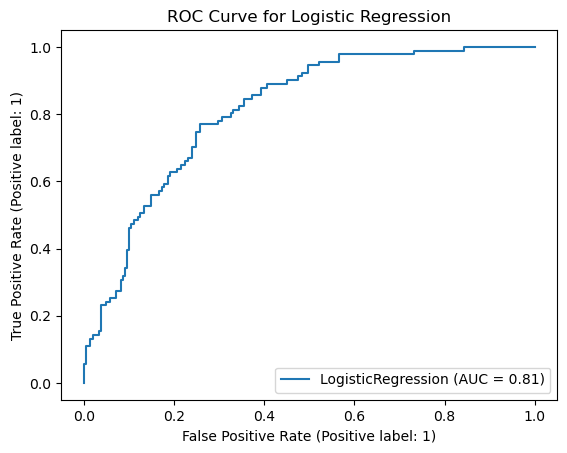

In [26]:
# create and train logistic regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# predict on test data
lr_pred = lr_model.predict(X_test)

# evaluate logistic regression model on testing sample data
print("Logistic Regression Model Evaluation on Testing Sample Data")
print("Classification report:\n", classification_report(y_test, lr_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, lr_pred))
print("Weighted Precision:", precision_score(y_test, lr_pred,average='weighted'))
print("Weighted Recall:", recall_score(y_test, lr_pred,average='weighted'))
print("Weighted F1 score:", f1_score(y_test, lr_pred,average='weighted'))

# calculate cross-validation score on full X and Y Data
lr_crossval_scores = cross_val_score(lr_model, X, y, cv=5)
print("Scores for 5-Fold Cross-validation:", lr_crossval_scores)
print("Final Average Accuracy of the model:", round(lr_crossval_scores.mean(),2))

# plot ROC curve
lr_disp = plot_roc_curve(lr_model, X_test, y_test)
lr_disp.ax_.set_title("ROC Curve for Logistic Regression")

## RANDOM FOREST


Random Forest model evaluation:
Classification report:
               precision    recall  f1-score   support

           0       0.79      0.91      0.85       209
           1       0.69      0.44      0.54        91

    accuracy                           0.77       300
   macro avg       0.74      0.68      0.69       300
weighted avg       0.76      0.77      0.75       300

Confusion matrix:
 [[191  18]
 [ 51  40]]
Weighted Precision: 0.7590438871473355
Weighted Recall: 0.77
Weighted F1 score: 0.7529448354886233
Scores for 5-Fold Cross-validation: [0.76  0.775 0.755 0.77  0.74 ]
Final Average Accuracy of the model: 0.76


Text(0.5, 1.0, 'ROC Curve for Random Forest')

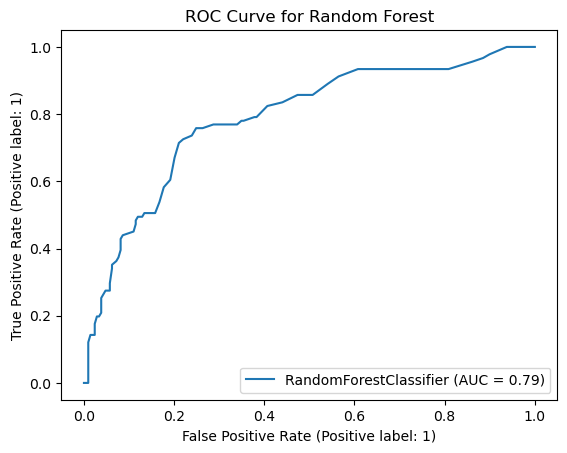

In [27]:
# create and train random forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# predict on test data
rf_pred = rf_model.predict(X_test)

# evaluate random forest model on testing sample data
print("\nRandom Forest model evaluation:")
print("Classification report:\n", classification_report(y_test, rf_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, rf_pred))
print("Weighted Precision:", precision_score(y_test, rf_pred, average='weighted'))
print("Weighted Recall:", recall_score(y_test, rf_pred, average='weighted'))
print("Weighted F1 score:", f1_score(y_test, rf_pred, average='weighted'))

# calculate cross-validation score on full X and Y Data
rf_crossval_scores = cross_val_score(rf_model, X, y, cv=5)
print("Scores for 5-Fold Cross-validation:", rf_crossval_scores)
print("Final Average Accuracy of the model:", round(rf_crossval_scores.mean(),2))

# plot ROC curve
rf_disp = plot_roc_curve(rf_model, X_test, y_test)
rf_disp.ax_.set_title("ROC Curve for Random Forest")

## DECISION TREE


Decision Tree Model Evaluation:
Classification report:
               precision    recall  f1-score   support

           0       0.76      0.82      0.79       209
           1       0.49      0.41      0.45        91

    accuracy                           0.69       300
   macro avg       0.63      0.61      0.62       300
weighted avg       0.68      0.69      0.68       300

Confusion matrix:
 [[171  38]
 [ 54  37]]
Weighted Precision: 0.6791111111111111
Weighted Recall: 0.6933333333333334
Weighted F1 score: 0.684207058649344
Scores for 5-Fold Cross-validation: [0.585 0.71  0.65  0.7   0.655]
Final Average Accuracy of the model: 0.66


Text(0.5, 1.0, 'ROC Curve for Decision Tree')

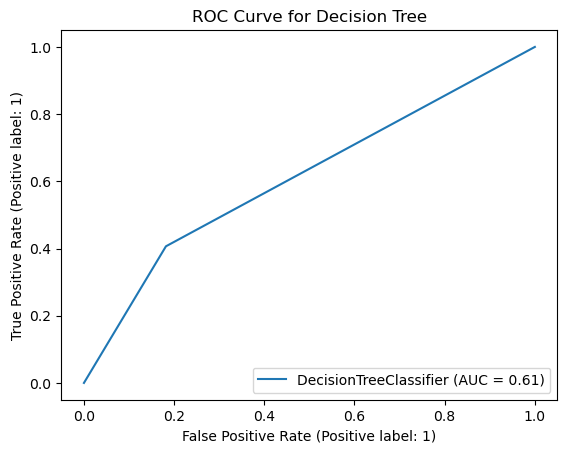

In [28]:
# create and train decision tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# predict on test data
dt_pred = dt_model.predict(X_test)

# evaluate decision tree model on testing sample data
print("\nDecision Tree Model Evaluation:")
print("Classification report:\n", classification_report(y_test, dt_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, dt_pred))
print("Weighted Precision:", precision_score(y_test, dt_pred, average='weighted'))
print("Weighted Recall:", recall_score(y_test, dt_pred, average='weighted'))
print("Weighted F1 score:", f1_score(y_test, dt_pred, average='weighted'))

# calculate cross-validation score on full X and Y Data
dt_crossval_scores = cross_val_score(dt_model, X, y, cv=5)
print("Scores for 5-Fold Cross-validation:", dt_crossval_scores)
print("Final Average Accuracy of the model:", round(dt_crossval_scores.mean(),2))

# plot ROC curve
dt_disp = plot_roc_curve(dt_model, X_test, y_test)
dt_disp.ax_.set_title("ROC Curve for Decision Tree")

## K-NEAREST NEIGHBOURS


KNN Model Evaluation:
Classification report:
               precision    recall  f1-score   support

           0       0.72      0.83      0.77       209
           1       0.40      0.26      0.32        91

    accuracy                           0.66       300
   macro avg       0.56      0.55      0.54       300
weighted avg       0.62      0.66      0.63       300

Confusion matrix:
 [[173  36]
 [ 67  24]]
Weighted Precision: 0.6235138888888889
Weighted Recall: 0.6566666666666666
Weighted F1 score: 0.6332761053506197
Scores for 5-Fold Cross-validation: [0.655 0.67  0.635 0.65  0.65 ]
Final Average Accuracy of the model: 0.65


Text(0.5, 1.0, 'ROC Curve for KNN')

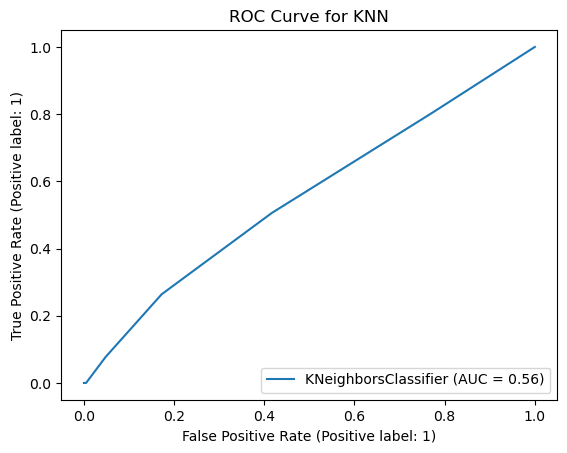

In [29]:
# create and train KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# predict on test data
knn_pred = knn_model.predict(X_test)

# evaluate KNN model on testing sample data
print("\nKNN Model Evaluation:")
print("Classification report:\n", classification_report(y_test, knn_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, knn_pred))
print("Weighted Precision:", precision_score(y_test, knn_pred, average='weighted'))
print("Weighted Recall:", recall_score(y_test, knn_pred, average='weighted'))
print("Weighted F1 score:", f1_score(y_test, knn_pred, average='weighted'))

# calculate cross-validation score on full X and Y Data
knn_crossval_scores = cross_val_score(knn_model, X, y, cv=5)
print("Scores for 5-Fold Cross-validation:", knn_crossval_scores)
print("Final Average Accuracy of the model:", round(knn_crossval_scores.mean(),2))

# plot ROC curve
knn_disp = plot_roc_curve(knn_model, X_test, y_test)
knn_disp.ax_.set_title("ROC Curve for KNN")

# MODEL COMPARISON WITH ROC CURVES

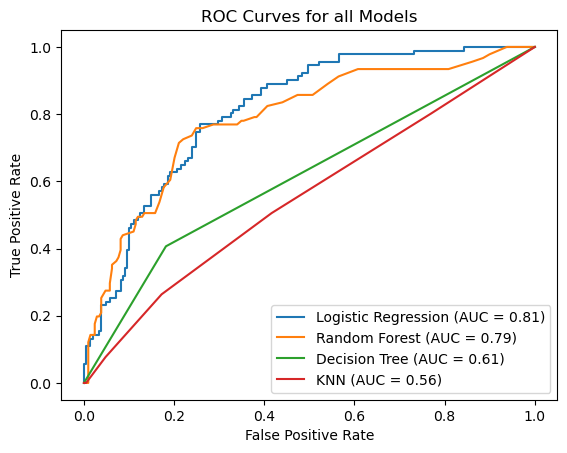

In [30]:
fig, ax = plt.subplots()

# plot ROC curves for all models
plot_roc_curve(lr_model, X_test, y_test, ax=ax, name='Logistic Regression')
plot_roc_curve(rf_model, X_test, y_test, ax=ax, name='Random Forest')
plot_roc_curve(dt_model, X_test, y_test, ax=ax, name='Decision Tree')
plot_roc_curve(knn_model, X_test, y_test, ax=ax, name='KNN')

# set title and labels
ax.set_title('ROC Curves for all Models')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend()

plt.show()